<a href="https://colab.research.google.com/github/LenkaMikova/Study/blob/main/GEEmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GEEmap


**GEEmap** je balíček Pythonu určený pro interaktivní analýzu a vizualizaci geoprostorových dat za využití nástroje Google Earth Engine. Podrobněji je celý balíček popsaný na stránce [geemap](https://geemap.org/) či na [GitHub](https://github.com/gee-community/geemap?tab=readme-ov-file). Výhoda tohoto balíčku je, že je možné celý obsah otevřít v různých aplikacích.

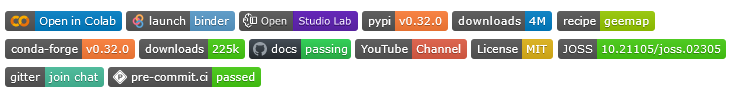

Balíček GEE map vyžaduje, aby měl uživatel [GEE](https://earthengine.google.com/) uživatelský účet. Bližší informace jsou popsány v [manuálu k balíčku](https://book.geemap.org/chapters/01_introduction.html#earth-engine-authentication).

## Instalace a import
Instalaci je možné provést několika způsoby prostřednictvím:


*   [PyPI](https://pypi.org/project/geemap/)
*   [Conda-forge](https://anaconda.org/conda-forge/geemap) (nejvíce doporučovaný způsob)
*   [GitHub](https://git-scm.com/) za použití Git nebo
*   <a href="https://colab.research.google.com/github/gee-community/geemap/blob/master/examples/notebooks/00_geemap_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Colab"/></a>, kde je již předinstalovaný a pravidelně aktualizovaný





PyPI - spuštění lze provést přímo z konzole (terminálu) za použití uvedeného příkazu

In [ ]:
#!pip install -U geemap

Conda-forge - vyžaduje předchozí instalaci [Anaconda](https://www.anaconda.com/download) či [Miniconda](https://docs.anaconda.com/free/miniconda). Tento způsob je velice často doporučovaný. Balíček má některé volitelné závislosti, jako jsou [GeoPandas](https://geopandas.org/) a [localtileserver](https://github.com/banesullivan/localtileserver). Volitelně je možné doinstalace rozšíření pro [Notebook Jupyter](https://github.com/ipython-contrib/jupyter_contrib_nbextensions)

In [ ]:
#conda install geemap -c conda-forge

GitHub - spustit lze obdobně jako PyPI prostřednictvím konzole (terminálu) za pomocí následujícího příkazu

In [ ]:
#pip install git+https://github.com/gee-community/geemap

Při práci s balíčkem přímo v Colab je balíček <b>Earth Engine Python API</b> již předinstalovaný. Před prvním použitím je třeba provést <u>autentifikaci</u> (propojení s účtem GEE).

In [ ]:
!pip install earthengine-api
# Při problémech s instalací se doporučuje odinstalovat a znovu nainstalovat
#!pip uninstall earthengine-api -y

Upgrade balíčku - pouze v případě potřeby

In [ ]:
#!pip install earthengine-api --upgrade

Import ee a následná autentifikace - v případě problémů při autentifikaci pomůže restartovat relaci, případně celý prohlážeč.

In [ ]:
import ee

In [ ]:
ee.Authenticate()

True

In [ ]:
# V pripade nutnosti vymazani tokenu GEE
#!rm -rf /root/.config/earthengine/

In [ ]:
ee.Initialize(project='lenkamikova256')

In [ ]:
# GEE map balicek pouze se zakladnimi funkcemi
import geemap.core as geemapCore
# GEE map se vsemi funkcemi
#import geemap

## Vykreslování
Geemap má několik různých vykreslovacích backendů:

*    [`ipyleaflet`](https://github.com/jupyter-widgets/ipyleaflet) - `import geemap`,
*    [`folium`](https://github.com/python-visualization/folium) - `import geemap.foliumap`,
*    [`plotly`](https://plotly.com/) - `import geemap.plotlymap`,
*    [`pydeck`](https://deckgl.readthedocs.io/en/latest/) - `import geemap.deck`,
*    [`kepler.gl`](https://docs.kepler.gl/docs/keplergl-jupyter) - `import geemap.kepler` a
*    [`heremap`](https://github.com/heremaps/here-map-widget-for-jupyter).



###Interaktivní mapa

In [ ]:
Map1 = geemapCore.Map()
Map1

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

### Image

In [ ]:
# nacteni Image
image = ee.Image('USGS/SRTMGL1_003')
image

Name,Description
elevation,Elevation


In [ ]:
# vykresleni Image

Map2 = geemapCore.Map(center=[21.79, 70.87], zoom=3)
image = ee.Image('USGS/SRTMGL1_003')
vis_params = {
    'min': 0,
    'max': 6000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}
Map2.addLayer(image, vis_params, 'SRTM')
Map2

Map(center=[21.79, 70.87], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

###Image Collection

In [ ]:
Map4 = geemapCore.Map()
collection = (
    ee.ImageCollection('COPERNICUS/S2_SR')
    .filterDate('2021-01-01', '2022-01-01')
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 5))
)
image = collection.median()

vis = {
    'min': 0.0,
    'max': 3000,
    'bands': ['B4', 'B3', 'B2'],
}

Map4.setCenter(83.277, 17.7009, 12)
Map4.addLayer(image, vis, 'Sentinel-2')
Map4

Map(center=[17.7009, 83.277], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

### Vizualizace



In [ ]:
Map5 = geemapCore.Map(center=[40, -100], zoom=4)

landsat7 = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003').select(
    ['B1', 'B2', 'B3', 'B4', 'B5', 'B7']
)

landsat_vis = {'bands': ['B4', 'B3', 'B2'], 'gamma': 1.4}
Map5.addLayer(landsat7, landsat_vis, "Landsat")

hyperion = ee.ImageCollection('EO1/HYPERION').filter(
    ee.Filter.date('2016-01-01', '2017-03-01')
)

hyperion_vis = {
    'min': 1000.0,
    'max': 14000.0,
    'gamma': 2.5,
}
Map5.addLayer(hyperion, hyperion_vis, 'Hyperion')
Map5

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

## Google Earth Engine Code Editor vs. Colab s GeeMap

### Jednoduché vykreslení

Javascript v GEE

```
var dataset = ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA')
  .filterDate('2023-01-01', '2023-12-31');

var trueColor432 = dataset.select(['B4', 'B3', 'B2']);
var trueColor432Vis = {
  min: 0.0,
  max: 0.4,
};

Map.setCenter(6.746, 46.529, 6);
Map.addLayer(trueColor432, trueColor432Vis, 'True Color (432)');

```
Alternativa v Python s GEE balíčkem

In [ ]:
Map6 = geemapCore.Map()
dataset = ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA').filterDate(
    '2023-01-01', '2023-12-31'
)
true_color_432 = dataset.select(['B4', 'B3', 'B2'])
true_color_432_vis = {
    'min': 0.0,
    'max': 0.4,
}

Map6.set_center(6.746, 46.529, 6)
Map6.add_layer(true_color_432, true_color_432_vis, 'True Color (432)')
Map6

Map(center=[46.529, 6.746], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

### Výpočet NDVI



```
var ndvi = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')
  .filterDate('2011-05-01', '2021-09-15')
  .median()
  .normalizedDifference(['SR_B5','SR_B4'])
  .clip(geometry);
Map.addLayer(ndvi);

```



In [ ]:
Map7 = geemapCore.Map(center=[11.9625, 48.4410], zoom=8)

ndvi = (ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')
  .filterDate('2011-05-01', '2021-09-15')
  .median()
  .normalizedDifference(['SR_B5','SR_B4'])
  #.clip(11.9625, 48.4410)
  )

Map7.setCenter(11.962, 48.441, 8)
Map7.addLayer(ndvi)
Map7

Map(center=[48.441, 11.962], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

###Spektral


```
// Load a Landsat 5 image and select the bands we want to unmix.
var bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7'];
var image = ee.Image('LANDSAT/LT05/C01/T1/LT05_044034_20080214')
  .select(bands);
Map.setCenter(-122.1899, 37.5010, 10); // San Francisco Bay
Map.addLayer(image, {bands: ['B4', 'B3', 'B2'], min: 0, max: 128}, 'image');

// Define spectral endmembers.
var urban = [88, 42, 48, 38, 86, 115, 59];
var veg = [50, 21, 20, 35, 50, 110, 23];
var water = [51, 20, 14, 9, 7, 116, 4];
var land = [69, 38, 50, 52, 110, 115, 66]

// Unmix the image.
var fractions = image.unmix([urban, veg, water, land]);
Map.addLayer(fractions, {}, 'unmixed');

```



In [ ]:
Map8 = geemapCore.Map(center=[-122.1899, 37.5010], zoom=10)
bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
image = (ee.Image('LANDSAT/LT05/C01/T1/LT05_044034_20080214')
  .select(bands))
Map8.setCenter(-122.1899, 37.5010); # San Francisco Bay
vis_params = {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 128}
Map8.addLayer(image, vis_params, 'image')
Map8


urban = [88, 42, 48, 38, 86, 115, 59]
veg = [50, 21, 20, 35, 50, 110, 23]
water = [51, 20, 14, 9, 7, 116, 4]
land = [69, 38, 50, 52, 110, 115, 66]

fractions = image.unmix([urban, veg, water, land])
Map8.addLayer(fractions, {}, 'unmixed')
Map8


Map(center=[37.501, -122.1899], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…